# Python for Data Analysis (NumPy & Pandas)

**Goals:** Master NumPy & Pandas via many hands‑on examples, lots of visualizations, and practical case studies.

**Schedule**
- **Wednesday:** NumPy (arrays, indexing, slicing, broadcasting, vectorization), Pandas basics (Series, DataFrame, CSV I/O, selection, new columns, sort, EDA).
- **Friday:** Advanced Pandas (cleaning: drop/fillna/filter/dedupe/type fix/strings/outliers; merge/join; groupby/pivot; rolling/expanding/EWM; resample; timezones; performance & safety; chunked CSV; `merge_asof`).

**Plotting rules**
- Use **matplotlib** only.
- **One chart per figure**.
- **Do not set any colors**.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
pd.set_option("display.width", 140)

np.random.seed(42)
os.makedirs("data", exist_ok=True)

# Safer writes in Pandas ≥2.0 (avoid chained assignment issues)
try:
    pd.options.mode.copy_on_write = True
    print("copy_on_write enabled")
except Exception as e:
    print("copy_on_write not available:", e)


NumPy: 2.3.2
Pandas: 2.3.1
copy_on_write enabled


## Table of Contents

1. **NumPy Basics**
   - 1.1 Arrays, dtypes, shapes, reshape
   - 1.2 Indexing, slicing
   - 1.3 Boolean & fancy indexing; views vs copies
   - 1.4 Broadcasting & vectorization
   - 1.5 Concatenate, split, sort, stats
   - 1.6 Random generator (default_rng), reproducibility
   - 1.7 Quick visualizations
   - 1.8 Exercises

2. **Pandas Basics**
   - 2.1 Series & DataFrame
   - 2.2 CSV I/O (parse_dates, na_values)
   - 2.3 Indexing & selection (.loc/.iloc/.query), new columns
   - 2.4 EDA & basic charts
   - 2.5 Sort, nlargest, duplicates
   - 2.6 Exercises

3. **Advanced Cleaning & Time Series**
   - 3.1 Missing values: dropna, fillna, interpolate, ffill/bfill (per group)
   - 3.2 Duplicates, dtype normalization, rename, reindex
   - 3.3 Strings: strip/replace/extract; categories; one‑hot
   - 3.4 Outliers: IQR, winsorize, MAD
   - 3.5 Merge/Join; anti & semi join; groupby; pivot/melt; crosstab
   - 3.6 Rolling/expanding/EWM; resample; gaps & reindex
   - 3.7 Performance & safety: vectorization vs .apply, .assign/.query/.eval, memory optimization
   - 3.8 Timezones & DST
   - 3.9 Chunked CSV processing
   - 3.10 `merge_asof` for nearest timestamp joins

4. **Case Studies**
   - 4.1 Retail daily sales: clean + MA + resample
   - 4.2 Customers & transactions: CLV‑like aggregation
   - 4.3 A/B testing: conversions, timestamps, z‑test
   - 4.4 Messy CSV: currencies (unicode minus, parentheses negatives), mixed dates
   - 4.5 Missingness matrix visualization
   - 4.6 Text normalization (names, email/phone, split city/state)
   - 4.7 Time series gaps & aggregates (W/M)
   - 4.8 IoT spikes: detect via MAD; rolling median smoothing
   - 4.9 Cohort analysis (signups vs retention)
   - 4.10 Event labeling with `merge_asof`

5. **Comprehensive Exercises + Hints**

6. **Quick Cheat Sheet**

7. **Appendix: Common Pitfalls & Fixes**


### 1.1 Arrays, dtypes, shapes, reshape
Create arrays from lists, specify dtypes, reshape, and compare views vs copies.


In [3]:
a = np.array([1, 2, 3])
b = np.array([[1.0, 2.0, 3.0],
              [4.0, 5.0, 6.0]], dtype=np.float64)

print("a:", a, "| dtype:", a.dtype, "| shape:", a.shape)
print("b:\n", b, "\n| dtype:", b.dtype, "| shape:", b.shape)

z = np.zeros((2, 3))
o = np.ones((3, 2))
ar = np.arange(0, 10, 2)
ln = np.linspace(0, 1, 5)

print("zeros:\n", z)
print("ones:\n", o)
print("arange:", ar)
print("linspace:", ln)

c = np.array([1, 2, 3], dtype=np.float32)
c_i = c.astype(np.int32)
print("c:", c, c.dtype, "->", c_i, c_i.dtype)

m = np.arange(12)
M = m.reshape(3, 4)
print("M shape:", M.shape)


a: [1 2 3] | dtype: int64 | shape: (3,)
b:
 [[1. 2. 3.]
 [4. 5. 6.]] 
| dtype: float64 | shape: (2, 3)
zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]
c: [1. 2. 3.] float32 -> [1 2 3] int32
M shape: (3, 4)


### 1.2 Indexing & slicing
Access rows/columns, submatrices, and strides.

In [4]:
M = np.arange(1, 13).reshape(3, 4)
print("M:\n", M)
print("M[0, 0] =", M[0, 0])
print("Row 1:", M[1])
print("Col 2:", M[:, 2])
print("Sub 0:2, 1:4\n", M[0:2, 1:4])
print("Stride every 2 cols:\n", M[:, ::2])


M:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
M[0, 0] = 1
Row 1: [5 6 7 8]
Col 2: [ 3  7 11]
Sub 0:2, 1:4
 [[2 3 4]
 [6 7 8]]
Stride every 2 cols:
 [[ 1  3]
 [ 5  7]
 [ 9 11]]


### 1.3 Boolean indexing & fancy indexing; views vs copies
Boolean masks filter by condition; fancy indexing uses index arrays (returns copies). Slices are views.

In [5]:
x = np.arange(10)
mask = (x % 2 == 0)
print("x:", x)
print("mask:", mask)
print("x[mask]:", x[mask])

idx = [0, 3, 7]
print("x[idx]:", x[idx])

# View vs Copy
y = x[2:6]      # view (slice)
y[0] = 999
print("After editing view y, x becomes:", x)

z = x[[1, 2, 3]].copy()  # fancy -> copy
z[0] = -1
print("Editing copy z does not affect x:", x)


x: [0 1 2 3 4 5 6 7 8 9]
mask: [ True False  True False  True False  True False  True False]
x[mask]: [0 2 4 6 8]
x[idx]: [0 3 7]
After editing view y, x becomes: [  0   1 999   3   4   5   6   7   8   9]
Editing copy z does not affect x: [  0   1 999   3   4   5   6   7   8   9]


### 1.4 Broadcasting & vectorization
Match shapes implicitly (e.g., add a row vector to every row). Prefer vectorized ops over Python loops for speed.

In [6]:
A = np.ones((3, 4))
v = np.array([1, 2, 3, 4])
print("A + v =\n", A + v)

# In Jupyter, you can benchmark with:
# %timeit big * 2.0
# %timeit np.array([val * 2.0 for val in big])
big = np.random.rand(200000)


A + v =
 [[2. 3. 4. 5.]
 [2. 3. 4. 5.]
 [2. 3. 4. 5.]]


### 1.5 Concatenate, split, sort, stats


In [7]:
X = np.random.randint(0, 100, size=(5, 3))
Y = np.random.randint(0, 100, size=(5, 3))
print("X:\n", X)
print("Y:\n", Y)

h = np.hstack([X, Y])
v = np.vstack([X, Y])
print("h shape:", h.shape, " | v shape:", v.shape)

parts = np.hsplit(h, 3)
print("num parts after hsplit:", len(parts))

s = np.sort(X, axis=0)
print("Sort columns:\n", s)
print("Min by col:", X.min(axis=0))
print("Max by col:", X.max(axis=0))
print("Mean all:", X.mean())
print("Std by row:", X.std(axis=1))


X:
 [[71 40 53]
 [ 9 74 17]
 [95 79 56]
 [83 23 83]
 [45 65 34]]
Y:
 [[73 98  3]
 [99 36 56]
 [62 45 51]
 [ 8 89 20]
 [89 69 11]]
h shape: (5, 6)  | v shape: (10, 3)
num parts after hsplit: 3
Sort columns:
 [[ 9 23 17]
 [45 40 34]
 [71 65 53]
 [83 74 56]
 [95 79 83]]
Min by col: [ 9 23 17]
Max by col: [95 79 83]
Mean all: 55.13333333333333
Std by row: [12.71045064 28.94055209 16.00694294 28.28427125 12.83225104]


### 1.6 Random generator & reproducibility
Prefer `np.random.default_rng()` for clarity and independent streams.


In [8]:
rng = np.random.default_rng(123)
print("rng.normal(0,1,5):", rng.normal(0, 1, 5))
print("rng.integers(0,10,5):", rng.integers(0, 10, 5))


rng.normal(0,1,5): [-0.98912135 -0.36778665  1.28792526  0.19397442  0.9202309 ]
rng.integers(0,10,5): [3 8 4 9 4]


### 1.7 Quick visualizations
One chart per figure; matplotlib only; no colors set.


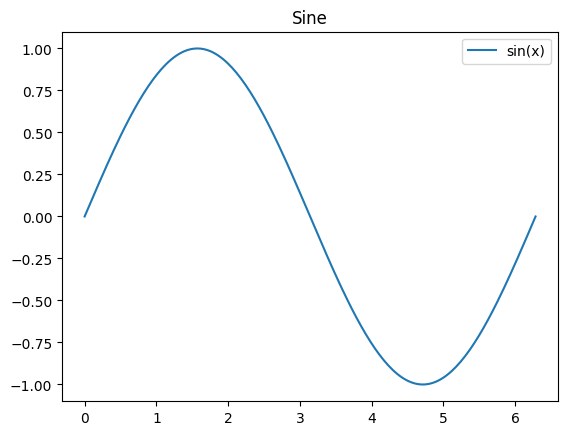

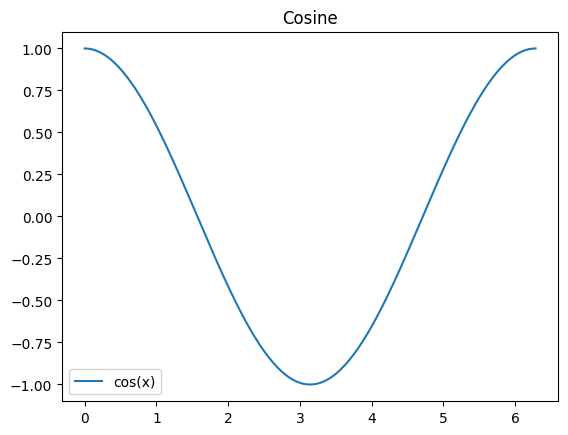

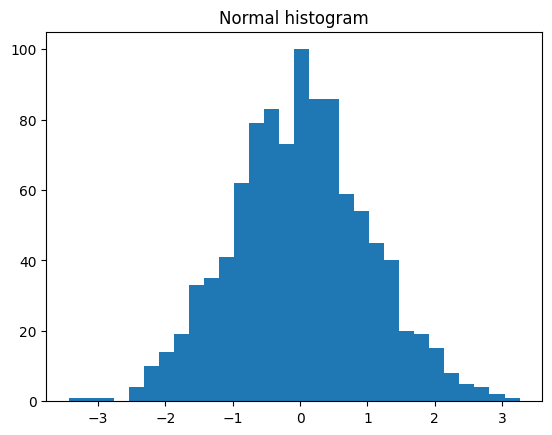

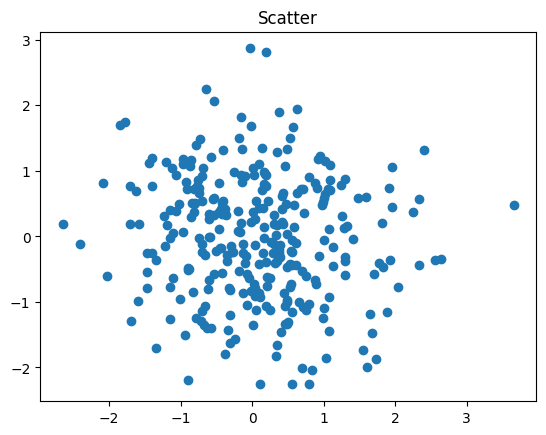

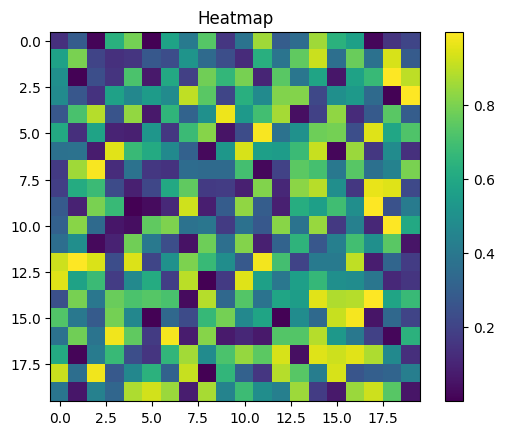

In [9]:
x = np.linspace(0, 2*np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure()
plt.plot(x, y1, label="sin(x)")
plt.title("Sine")
plt.legend()
plt.show()

plt.figure()
plt.plot(x, y2, label="cos(x)")
plt.title("Cosine")
plt.legend()
plt.show()

vals = np.random.randn(1000)
plt.figure()
plt.hist(vals, bins=30)
plt.title("Normal histogram")
plt.show()

pts = np.random.randn(300, 2)
plt.figure()
plt.scatter(pts[:, 0], pts[:, 1])
plt.title("Scatter")
plt.show()

Z = np.random.rand(20, 20)
plt.figure()
plt.imshow(Z)
plt.title("Heatmap")
plt.colorbar()
plt.show()


### 1.8 Exercises
1) Create a 5×5 matrix of random ints [0,9]; set even elements in the last column to -1 (boolean mask).  
2) Make a vector `v` of length 1000 ~ N(0,1); normalize to mean 0, std 1 (vectorized). Plot histogram.  
3) Build meshgrid `X, Y` on [-2,2]²; compute `R = sqrt(X^2 + Y^2)`; show with `imshow(R)`.
